In [33]:
#Import the correct library
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Remove display restrictions
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 

## Initial load and look

In [34]:
# Load in the database 

# Conditional Admits
raw_conditional_admits = pd.read_csv('Conditional_Admits.csv')
print(f'intial number of conditional admits: {len(raw_conditional_admits)}')

# Fall registration
fall_registration = pd.read_csv('Fall 2022 Registration - Removed Drops.csv')
print(f'Number of fall registrations: {len(fall_registration )}')
# Spring Registration
spring_registration = pd.read_csv('Spring 2023 Registered Students.csv')
print(f'Number of spring registrations: {len(spring_registration)}')

intial number of conditional admits: 375
Number of fall registrations: 37861
Number of spring registrations: 8377


C:\Users\kahsw\AppData\Local\Temp\ipykernel_17148\2117487555.py:8: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.



In [35]:
# adds a column for each row for the semester
spring_registration['semester'] = "spring"
fall_registration['semester'] = "fall"
# check output of spring
spring_registration.head(3)


,ID,E04,Registration Status,Admissions Status,Matriculation Status,Attendance Status,Class Level,Total Credits Enrolled,County,School,Program,Degree,Major,Major_Desc,Program.1,Concentration,age,Housing,Ethnicity_ALL,BannerTerm,Residency,semester
0,133246,Male,First-Time,Regular,Degree-Seeking,FT,First-Year,16,Not NJ Resident,UNDC,UNDC,U,0,Undeclared,UNDC,GENE,20,NaN,Caucasian or White,202320,R,spring
1,132899,Male,First-Time,Regular,Degree-Seeking,FT,First-Year,16,Atlantic,NAMS,PHYS-BS,BS,PHYS,Applied Physics,PHYS-BS,COND,25,NaN,Caucasian or White,202320,R,spring
2,133149,Male,First-Time,Regular,Degree-Seeking,FT,First-Year,17,Ocean,NAMS,MATH-BS,BS,MATH,Mathematics,MATH-BS,GENE,20,Y,Caucasian or White,202320,R,spring


In [36]:
# check output of fall 
fall_registration.head(3)

,ID,Term_Code,Gender,Ethnicity,Citizenship_Ind,State,County_Desc,Total_Credit_Hours,STYP_Code,Program,Secondary_Program,Level,Major,Major_Desc,Major_2,Major_2_Desc,Minor_1,Minor_1_2,Minor_2,ADMT_Code,Admit_Desc,Concentration,Admit_Term,Term_GPA,Overall_GPA,Inst_Hours_Attempted,Inst_Hours_Earned,Overall_Hours_Attempted,Overall_Hours_Earned,Prev_ASTD_Code_EOT,ASTD_Code_EOT,ASTD_Code_Override,Enrollment_Add_Date,CRN,Subject,Course,Credit_Hours,Title,Grade,Final_Grade,Campus,Instructional_Method,SCHD_Code,Housing,RESD_Code,3S_Ind,All_Sports,Math_Readiness_Ind,Veteran_Ind,semester
0,124009,202280,F,More Than 1 Race,Y,NJ,Atlantic,12.0,C,SOWK,NaN,U,SOWK,Social Work,NaN,NaN,NaN,NaN,NaN,R1,Readmit First Degree,GENE,202220,4.0,2.64,40.0,28.0,104.0,92.0,GS,GS,CP,4/20/2022,80114,GNM,2138,4.0,SCIENTIFIC INQUIRY,A,A,RSC,DEHYB,HYF,NaN,R,NaN,NaN,N,NaN,fall
1,124009,202280,F,More Than 1 Race,Y,NJ,Atlantic,12.0,C,SOWK,NaN,U,SOWK,Social Work,NaN,NaN,NaN,NaN,NaN,R1,Readmit First Degree,GENE,202220,4.0,2.64,40.0,28.0,104.0,92.0,GS,GS,CP,4/20/2022,81401,SOWK,3101,4.0,HIST. OF SOCIAL WELFARE POLICY,A,A,RSC,DEHYB,HYF,NaN,R,NaN,NaN,N,NaN,fall
2,124009,202280,F,More Than 1 Race,Y,NJ,Atlantic,12.0,C,SOWK,NaN,U,SOWK,Social Work,NaN,NaN,NaN,NaN,NaN,R1,Readmit First Degree,GENE,202220,4.0,2.64,40.0,28.0,104.0,92.0,GS,GS,CP,4/20/2022,81361,PSYC,3391,4.0,EDUCATIONAL PSYCHOLOGY,A,A,RSC,LEC,F2F,NaN,R,NaN,NaN,N,NaN,fall


In [37]:
raw_conditional_admits.head(3)

,ID,SPRADDR_CNTY_CODE,SARADAP_STYP_CODE_2,SPRADDR_STAT_CODE,SARADAP_ADMT_CODE,ETHNICITY,SARAPPD_APDC_CODE,SARAPPD_APDC_DATE,SARADAP_MAJR_CODE_1,SARADAP_PROGRAM_1,SARADAP_MAJR_CODE_CONC_1,AGE,HS_NAME,HS_CITY,HS_STATE,HS_COUNTY,SPBPERS_SEX,SAT_MATH,SAT_ERBW,SAT_TOTAL,ACT_COMPOSITE,COL_DESC,COL_STATE,DCHS_IND,REC_TEST_PLAN,HOUSING_INTEREST,FIRST_GEN_IND,PCKG_GROUP_IND,HOUS_DEP_PAID,FAFSA_IND,REC_EOF_LOCATION,REC_COUNTRY_OF_ORIG,REC_COMPLETED_DATE
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,CSCI,CSCI,COND,21,MC College,Sylhet,NaN,Out of State,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-23
1,132296,99,F,NaN,FX,Non-Resident,IE,2022-04-21,CSCI,CSCI,COND,18,Milestone College,Dhaka,NaN,Out of State,M,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-21
2,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,BIOL,BIOL-BS,COND,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,M,NaN,NaN,0,NaN,OCEAN COUNTY COLLEGE,NJ,NaN,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-02-21


##### rename so we can combine on similar names

In [38]:
# make everything lower case
spring_registration.columns = [col.lower().strip()  for col in spring_registration.columns]
# fill all teh spaces with _
spring_registration.columns = [col.replace(' ','_') for col in spring_registration.columns]

spring_registration.columns

# makes the entries in the column lower case 
spring_registration['attendance_status'] = spring_registration['attendance_status'].str.lower()

# drops unnessary second column
spring_registration.drop(columns='program.1', inplace=True)
# fills math readiness with Na
spring_registration['math_readiness_ind'] = np.nan
spring_registration['overall_gpa'] = np.nan
spring_registration['final_grade'] = np.nan

# major_desc --> spring_major_desc
# E04 --> gender
# Program.1 --> program
spring_registration.rename(columns={
                                    'e04':'gender',
                                    'program.1':'program'}, inplace=True)

# changes all Male into m and Female into f and fills the blanks with n
spring_registration['gender'] = spring_registration['gender'].replace({ 
                                                                        'Male':'m','Female':'f'})
spring_registration['gender'] = spring_registration['gender'].replace('','n')

spring_registration.head(3)

,id,gender,registration_status,admissions_status,matriculation_status,attendance_status,class_level,total_credits_enrolled,county,school,program,degree,major,major_desc,concentration,age,housing,ethnicity_all,bannerterm,residency,semester,math_readiness_ind,overall_gpa,final_grade
0,133246,m,First-Time,Regular,Degree-Seeking,ft,First-Year,16,Not NJ Resident,UNDC,UNDC,U,0,Undeclared,GENE,20,NaN,Caucasian or White,202320,R,spring,NaN,NaN,NaN
1,132899,m,First-Time,Regular,Degree-Seeking,ft,First-Year,16,Atlantic,NAMS,PHYS-BS,BS,PHYS,Applied Physics,COND,25,NaN,Caucasian or White,202320,R,spring,NaN,NaN,NaN
2,133149,m,First-Time,Regular,Degree-Seeking,ft,First-Year,17,Ocean,NAMS,MATH-BS,BS,MATH,Mathematics,GENE,20,Y,Caucasian or White,202320,R,spring,NaN,NaN,NaN


In [39]:
fall_registration.columns = [col.lower().strip() for col in fall_registration.columns ]

# makes the entries in the column lower case 
fall_registration['gender'] = fall_registration['gender'].str.lower()


# put in new Attendance Status column using Total_Credit_Hours above 9 is ft below is pt 
# converts to int 
fall_registration['total_credit_hours'] = fall_registration['total_credit_hours'].astype(int)
#iterates through and adds the item
for index, row in fall_registration.iterrows():
    if row['total_credit_hours'] >= 9:
        fall_registration.at[index, 'attendance_status'] = "ft"
    else:
        fall_registration.at[index, 'attendance_status'] = "pt"


fall_registration.head(3)


,id,term_code,gender,ethnicity,citizenship_ind,state,county_desc,total_credit_hours,styp_code,program,secondary_program,level,major,major_desc,major_2,major_2_desc,minor_1,minor_1_2,minor_2,admt_code,admit_desc,concentration,admit_term,term_gpa,overall_gpa,inst_hours_attempted,inst_hours_earned,overall_hours_attempted,overall_hours_earned,prev_astd_code_eot,astd_code_eot,astd_code_override,enrollment_add_date,crn,subject,course,credit_hours,title,grade,final_grade,campus,instructional_method,schd_code,housing,resd_code,3s_ind,all_sports,math_readiness_ind,veteran_ind,semester,attendance_status
0,124009,202280,f,More Than 1 Race,Y,NJ,Atlantic,12,C,SOWK,NaN,U,SOWK,Social Work,NaN,NaN,NaN,NaN,NaN,R1,Readmit First Degree,GENE,202220,4.0,2.64,40.0,28.0,104.0,92.0,GS,GS,CP,4/20/2022,80114,GNM,2138,4.0,SCIENTIFIC INQUIRY,A,A,RSC,DEHYB,HYF,NaN,R,NaN,NaN,N,NaN,fall,ft
1,124009,202280,f,More Than 1 Race,Y,NJ,Atlantic,12,C,SOWK,NaN,U,SOWK,Social Work,NaN,NaN,NaN,NaN,NaN,R1,Readmit First Degree,GENE,202220,4.0,2.64,40.0,28.0,104.0,92.0,GS,GS,CP,4/20/2022,81401,SOWK,3101,4.0,HIST. OF SOCIAL WELFARE POLICY,A,A,RSC,DEHYB,HYF,NaN,R,NaN,NaN,N,NaN,fall,ft
2,124009,202280,f,More Than 1 Race,Y,NJ,Atlantic,12,C,SOWK,NaN,U,SOWK,Social Work,NaN,NaN,NaN,NaN,NaN,R1,Readmit First Degree,GENE,202220,4.0,2.64,40.0,28.0,104.0,92.0,GS,GS,CP,4/20/2022,81361,PSYC,3391,4.0,EDUCATIONAL PSYCHOLOGY,A,A,RSC,LEC,F2F,NaN,R,NaN,NaN,N,NaN,fall,ft


In [40]:
raw_conditional_admits.columns = [col.lower().strip()   for col in raw_conditional_admits.columns ]

raw_conditional_admits['spbpers_sex'] = raw_conditional_admits['spbpers_sex'].str.lower()

# SPBPERS_SEX --> gender
# SARADAP_MAJR_CODE_1 --> Major
raw_conditional_admits.rename(columns={
                                    'spbpers_sex':'gender',
                                    'saradap_majr_code_1':'major'}, inplace=True)
raw_conditional_admits.drop(columns='saradap_program_1', inplace=True)

raw_conditional_admits.head(3)

,id,spraddr_cnty_code,saradap_styp_code_2,spraddr_stat_code,saradap_admt_code,ethnicity,sarappd_apdc_code,sarappd_apdc_date,major,saradap_majr_code_conc_1,age,hs_name,hs_city,hs_state,hs_county,gender,sat_math,sat_erbw,sat_total,act_composite,col_desc,col_state,dchs_ind,rec_test_plan,housing_interest,first_gen_ind,pckg_group_ind,hous_dep_paid,fafsa_ind,rec_eof_location,rec_country_of_orig,rec_completed_date
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,CSCI,COND,21,MC College,Sylhet,NaN,Out of State,m,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-23
1,132296,99,F,NaN,FX,Non-Resident,IE,2022-04-21,CSCI,COND,18,Milestone College,Dhaka,NaN,Out of State,m,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-21
2,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,BIOL,COND,18,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,m,NaN,NaN,0,NaN,OCEAN COUNTY COLLEGE,NJ,NaN,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-02-21


In [41]:
# combines spring prints amount of students 
spring_conditional_admits= pd.merge(raw_conditional_admits, spring_registration, on='id', how='left')

column_x = ['major_x','age_x','gender_x']
column_y =['major_y','age_y','gender_y']
# handles duplicate columns
for col_x,col_y in zip(column_x,column_y):
    new_column_name = col_x[:-2]
    spring_conditional_admits[new_column_name] = spring_conditional_admits[col_x].combine_first(spring_conditional_admits[col_y])
    spring_conditional_admits.drop(columns=[col_x, col_y], inplace=True)

print(f'number of columns {len(spring_conditional_admits.columns)}')
print(spring_conditional_admits.columns)
spring_conditional_admits.head(4)

number of columns 52
Index(['id', 'spraddr_cnty_code', 'saradap_styp_code_2', 'spraddr_stat_code',
       'saradap_admt_code', 'ethnicity', 'sarappd_apdc_code',
       'sarappd_apdc_date', 'saradap_majr_code_conc_1', 'hs_name', 'hs_city',
       'hs_state', 'hs_county', 'sat_math', 'sat_erbw', 'sat_total',
       'act_composite', 'col_desc', 'col_state', 'dchs_ind', 'rec_test_plan',
       'housing_interest', 'first_gen_ind', 'pckg_group_ind', 'hous_dep_paid',
       'fafsa_ind', 'rec_eof_location', 'rec_country_of_orig',
       'rec_completed_date', 'registration_status', 'admissions_status',
       'matriculation_status', 'attendance_status', 'class_level',
       'total_credits_enrolled', 'county', 'school', 'program', 'degree',
       'major_desc', 'concentration', 'housing', 'ethnicity_all', 'bannerterm',
       'residency', 'semester', 'math_readiness_ind', 'overall_gpa',
       'final_grade', 'major', 'age', 'gender'],
      dtype='object')


C:\Users\kahsw\AppData\Local\Temp\ipykernel_17148\1214343964.py:9: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



,id,spraddr_cnty_code,saradap_styp_code_2,spraddr_stat_code,saradap_admt_code,ethnicity,sarappd_apdc_code,sarappd_apdc_date,saradap_majr_code_conc_1,hs_name,hs_city,hs_state,hs_county,sat_math,sat_erbw,sat_total,act_composite,col_desc,col_state,dchs_ind,rec_test_plan,housing_interest,first_gen_ind,pckg_group_ind,hous_dep_paid,fafsa_ind,rec_eof_location,rec_country_of_orig,rec_completed_date,registration_status,admissions_status,matriculation_status,attendance_status,class_level,total_credits_enrolled,county,school,program,degree,major_desc,concentration,housing,ethnicity_all,bannerterm,residency,semester,math_readiness_ind,overall_gpa,final_grade,major,age,gender
0,132318,1,F,NJ,FX,Non-Resident,IE,2022-04-20,COND,MC College,Sylhet,NaN,Out of State,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-23,Continuing,Regular,Degree-Seeking,ft,First-Year,17.0,Atlantic,BUSN,CSCI,BS,Computer Science,GENE,NaN,Non Resident Alien,202320.0,N,spring,NaN,NaN,NaN,CSCI,21,m
1,132296,99,F,NaN,FX,Non-Resident,IE,2022-04-21,COND,Milestone College,Dhaka,NaN,Out of State,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CSCI,18,m
2,131801,29,F,NJ,FR,Native Hawaiian or other Pacific Islander,IE,2022-04-23,COND,BRICK TOWNSHIP HIGH SCHOOL,BRICKTOWN,NJ,Ocean,NaN,NaN,0,NaN,OCEAN COUNTY COLLEGE,NJ,NaN,I will NOT submit SAT or ACT scores,HO,NaN,UGONN,Y,Y,NaN,NaN,2022-02-21,Continuing,Regular,Degree-Seeking,ft,First-Year,18.0,Ocean,NAMS,BIOL-BS,BS,Biology,GENE,Y,Hawaaiian or Pacific Islander,202320.0,R,spring,NaN,NaN,NaN,BIOL,18,m
3,130864,29,F,NJ,FI,Non-Resident,IE,2022-03-25,COND,SOUTHERN REGIONAL HIGH SCHOOL,MANAHAWKIN,NJ,Ocean,NaN,NaN,0,NaN,NaN,NaN,NaN,I will submit SAT or ACT scores,NaN,FGNN: Graduate school,NaN,NaN,NaN,NaN,Sierra Leone,2021-10-22,Continuing,Regular,Degree-Seeking,ft,First-Year,17.0,Ocean,NAMS,BIOL-BS,BS,Biology,COND,NaN,Non Resident Alien,202320.0,R,spring,NaN,NaN,NaN,BIOL,19,f


In [42]:
fall_conditional_admits= pd.merge(raw_conditional_admits, fall_registration, on='id', how='left')
column_x = ['major_x','gender_x','ethnicity_x']
column_y =['major_y','gender_y','ethnicity_y']
for col_x,col_y in zip(column_x,column_y):
    new_column_name = col_x[:-2]
    fall_conditional_admits[new_column_name] = fall_conditional_admits[col_x].combine_first(fall_conditional_admits[col_y])
    fall_conditional_admits.drop(columns=[col_x, col_y], inplace=True)

print(fall_conditional_admits.columns)
print(f'number of columns {len(fall_conditional_admits.columns)}')
fall_conditional_admits.head(4)

Index(['id', 'spraddr_cnty_code', 'saradap_styp_code_2', 'spraddr_stat_code',
       'saradap_admt_code', 'sarappd_apdc_code', 'sarappd_apdc_date',
       'saradap_majr_code_conc_1', 'age', 'hs_name', 'hs_city', 'hs_state',
       'hs_county', 'sat_math', 'sat_erbw', 'sat_total', 'act_composite',
       'col_desc', 'col_state', 'dchs_ind', 'rec_test_plan',
       'housing_interest', 'first_gen_ind', 'pckg_group_ind', 'hous_dep_paid',
       'fafsa_ind', 'rec_eof_location', 'rec_country_of_orig',
       'rec_completed_date', 'term_code', 'citizenship_ind', 'state',
       'county_desc', 'total_credit_hours', 'styp_code', 'program',
       'secondary_program', 'level', 'major_desc', 'major_2', 'major_2_desc',
       'minor_1', 'minor_1_2', 'minor_2', 'admt_code', 'admit_desc',
       'concentration', 'admit_term', 'term_gpa', 'overall_gpa',
       'inst_hours_attempted', 'inst_hours_earned', 'overall_hours_attempted',
       'overall_hours_earned', 'prev_astd_code_eot', 'astd_code_eot',


,id,spraddr_cnty_code,saradap_styp_code_2,spraddr_stat_code,saradap_admt_code,sarappd_apdc_code,sarappd_apdc_date,saradap_majr_code_conc_1,age,hs_name,hs_city,hs_state,hs_county,sat_math,sat_erbw,sat_total,act_composite,col_desc,col_state,dchs_ind,rec_test_plan,housing_interest,first_gen_ind,pckg_group_ind,hous_dep_paid,fafsa_ind,rec_eof_location,rec_country_of_orig,rec_completed_date,term_code,citizenship_ind,state,county_desc,total_credit_hours,styp_code,program,secondary_program,level,major_desc,major_2,major_2_desc,minor_1,minor_1_2,minor_2,admt_code,admit_desc,concentration,admit_term,term_gpa,overall_gpa,inst_hours_attempted,inst_hours_earned,overall_hours_attempted,overall_hours_earned,prev_astd_code_eot,astd_code_eot,astd_code_override,enrollment_add_date,crn,subject,course,credit_hours,title,grade,final_grade,campus,instructional_method,schd_code,housing,resd_code,3s_ind,all_sports,math_readiness_ind,veteran_ind,semester,attendance_status,major,gender,ethnicity
0,132318,1,F,NJ,FX,IE,2022-04-20,COND,21,MC College,Sylhet,NaN,Out of State,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-23,202280.0,N,NJ,Atlantic,16.0,F,CSCI,NaN,U,Computer Science,NaN,NaN,NaN,NaN,NaN,FX,First-Tm Internatl Outside US,GENE,202280.0,4.0,4.0,16.0,16.0,16.0,16.0,NaN,GS,NaN,8/26/2022 13:36,80905.0,GAH,2333.0,4.0,ETHICS/LITERATURE/LEADERSHIP,A,A,RSC,LEC,F2F,NaN,N,NaN,NaN,Y,NaN,fall,ft,CSCI,m,Non-Resident
1,132318,1,F,NJ,FX,IE,2022-04-20,COND,21,MC College,Sylhet,NaN,Out of State,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-23,202280.0,N,NJ,Atlantic,16.0,F,CSCI,NaN,U,Computer Science,NaN,NaN,NaN,NaN,NaN,FX,First-Tm Internatl Outside US,GENE,202280.0,4.0,4.0,16.0,16.0,16.0,16.0,NaN,GS,NaN,8/26/2022 13:36,80498.0,GAH,3205.0,4.0,QUEER AUTOBIOGRAPHIES,A,A,RSC,LEC,F2F,NaN,N,NaN,NaN,Y,NaN,fall,ft,CSCI,m,Non-Resident
2,132318,1,F,NJ,FX,IE,2022-04-20,COND,21,MC College,Sylhet,NaN,Out of State,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-23,202280.0,N,NJ,Atlantic,16.0,F,CSCI,NaN,U,Computer Science,NaN,NaN,NaN,NaN,NaN,FX,First-Tm Internatl Outside US,GENE,202280.0,4.0,4.0,16.0,16.0,16.0,16.0,NaN,GS,NaN,8/26/2022 13:36,80837.0,MATH,1100.0,4.0,PRECALCULUS MATHEMATICS,A,A,RSC,LEC,F2F,NaN,N,NaN,NaN,Y,NaN,fall,ft,CSCI,m,Non-Resident
3,132318,1,F,NJ,FX,IE,2022-04-20,COND,21,MC College,Sylhet,NaN,Out of State,NaN,NaN,0,NaN,NaN,NaN,NaN,I will NOT submit SAT or ACT scores,HO,FGNN: Graduated from college: Bachelors degree,NaN,Y,NaN,NaN,Bangladesh,2022-03-23,202280.0,N,NJ,Atlantic,16.0,F,CSCI,NaN,U,Computer Science,NaN,NaN,NaN,NaN,NaN,FX,First-Tm Internatl Outside US,GENE,202280.0,4.0,4.0,16.0,16.0,16.0,16.0,NaN,GS,NaN,8/26/2022 13:36,80199.0,FRST,1002.0,4.0,CRITICAL THINKING AND READING,A,A,ACC,SEM,F2F,NaN,N,NaN,NaN,Y,NaN,fall,ft,CSCI,m,Non-Resident


In [43]:
#finds common columns and puts them into a list 
fall_columns = set(fall_conditional_admits)
spring_columns = set(spring_conditional_admits)

#combines them
common_columns = spring_columns.intersection(fall_columns)
common_columns_list = list(common_columns)

#print(common_columns_list)
print(f'number of columns {len(common_columns)}')
print(f'number of columns from list {len(common_columns_list)}')



number of columns 41
number of columns from list 41


In [44]:
# subset the fall data so that it brings over only the common columns
spring_conditional_admits = spring_conditional_admits[common_columns_list]
# reset the index
spring_conditional_admits = spring_conditional_admits.reset_index(drop=False)
#drops the index column created by reseting the index
spring_conditional_admits.drop(columns=['index'], inplace=True)


print(spring_conditional_admits.columns)
#print(common_columns_list)
#this is a check the same number of columns in the list are carried over
print(f'number of columns {len(spring_conditional_admits.columns)}')
print(f'number of columns from list {len(common_columns_list)}')

spring_conditional_admits.head(3)
print(f'length of the spring files {len(spring_conditional_admits)}')

Index(['sarappd_apdc_code', 'attendance_status', 'act_composite',
       'rec_test_plan', 'fafsa_ind', 'rec_country_of_orig', 'rec_eof_location',
       'gender', 'semester', 'major', 'saradap_admt_code', 'program',
       'first_gen_ind', 'math_readiness_ind', 'pckg_group_ind',
       'concentration', 'housing_interest', 'hs_name', 'overall_gpa',
       'major_desc', 'spraddr_cnty_code', 'age', 'saradap_majr_code_conc_1',
       'housing', 'final_grade', 'hs_state', 'hs_county',
       'saradap_styp_code_2', 'id', 'spraddr_stat_code', 'col_desc',
       'sarappd_apdc_date', 'rec_completed_date', 'hous_dep_paid', 'hs_city',
       'sat_erbw', 'dchs_ind', 'sat_math', 'sat_total', 'col_state',
       'ethnicity'],
      dtype='object')
number of columns 41
number of columns from list 41
length of the spring files 375


In [45]:
fall_conditional_admits = fall_conditional_admits[common_columns_list]
fall_conditional_admits = fall_conditional_admits.reset_index(drop=False)
fall_conditional_admits.drop(columns=['index'], inplace=True)

print(fall_conditional_admits.columns)
print(f'number of columns in dataframe {len(fall_conditional_admits.columns)}')
print(f'number of columns from list {len(common_columns_list)}')

fall_conditional_admits.head(3)
print(f'length of the fall files {len(fall_conditional_admits)}')

Index(['sarappd_apdc_code', 'attendance_status', 'act_composite',
       'rec_test_plan', 'fafsa_ind', 'rec_country_of_orig', 'rec_eof_location',
       'gender', 'semester', 'major', 'saradap_admt_code', 'program',
       'first_gen_ind', 'math_readiness_ind', 'pckg_group_ind',
       'concentration', 'housing_interest', 'hs_name', 'overall_gpa',
       'major_desc', 'spraddr_cnty_code', 'age', 'saradap_majr_code_conc_1',
       'housing', 'final_grade', 'hs_state', 'hs_county',
       'saradap_styp_code_2', 'id', 'spraddr_stat_code', 'col_desc',
       'sarappd_apdc_date', 'rec_completed_date', 'hous_dep_paid', 'hs_city',
       'sat_erbw', 'dchs_ind', 'sat_math', 'sat_total', 'col_state',
       'ethnicity'],
      dtype='object')
number of columns in dataframe 41
number of columns from list 41
length of the fall files 1673


In [46]:
# concatenates the data so that the spring is added in to account for the students going in 
# we ignore the index because we want to make is so the spring values are included at the end of the the fall data
conditional_admits = pd.concat([spring_conditional_admits, fall_conditional_admits], ignore_index= True, )

#reinserts the id and semester back to the first column
id_col = conditional_admits.pop('id')
conditional_admits.insert(0, 'id', id_col)

semester_col = conditional_admits.pop('semester')
conditional_admits.insert(1, 'semester', semester_col)

# to know this worked the total length should be len(fall_conditional_admits) + len(spring_conditional_admits) = len(conditional_admits)
print(len(fall_conditional_admits)) 
conditional_admits.head(3)
print(f'length of the conditional admits {len(conditional_admits)}')

#Save the dataset into a .csv
conditional_admits.to_csv('conditional_dataset_for_analysis.csv')

1673
length of the conditional admits 2048


In [47]:
# Changes changes to na to no in FAFSA_IND
conditional_admits['fafsa_ind'] = conditional_admits['fafsa_ind'].fillna('n')
conditional_admits['fafsa_ind'] = conditional_admits['fafsa_ind'].replace('Y','y')
conditional_admits['fafsa_ind'].head(3)

0    n
1    n
2    y
Name: fafsa_ind, dtype: object

In [48]:
#how many records are in the data set 
conditional_admits.size

83968

## General Exploratory Analysis

In [49]:
#View column names 
conditional_admits.columns

Index(['id', 'semester', 'sarappd_apdc_code', 'attendance_status',
       'act_composite', 'rec_test_plan', 'fafsa_ind', 'rec_country_of_orig',
       'rec_eof_location', 'gender', 'major', 'saradap_admt_code', 'program',
       'first_gen_ind', 'math_readiness_ind', 'pckg_group_ind',
       'concentration', 'housing_interest', 'hs_name', 'overall_gpa',
       'major_desc', 'spraddr_cnty_code', 'age', 'saradap_majr_code_conc_1',
       'housing', 'final_grade', 'hs_state', 'hs_county',
       'saradap_styp_code_2', 'spraddr_stat_code', 'col_desc',
       'sarappd_apdc_date', 'rec_completed_date', 'hous_dep_paid', 'hs_city',
       'sat_erbw', 'dchs_ind', 'sat_math', 'sat_total', 'col_state',
       'ethnicity'],
      dtype='object')

In [50]:
# rename the column
conditional_admits = conditional_admits.rename(columns={'Title':'course_title'})

#Show columns
conditional_admits.columns

Index(['id', 'semester', 'sarappd_apdc_code', 'attendance_status',
       'act_composite', 'rec_test_plan', 'fafsa_ind', 'rec_country_of_orig',
       'rec_eof_location', 'gender', 'major', 'saradap_admt_code', 'program',
       'first_gen_ind', 'math_readiness_ind', 'pckg_group_ind',
       'concentration', 'housing_interest', 'hs_name', 'overall_gpa',
       'major_desc', 'spraddr_cnty_code', 'age', 'saradap_majr_code_conc_1',
       'housing', 'final_grade', 'hs_state', 'hs_county',
       'saradap_styp_code_2', 'spraddr_stat_code', 'col_desc',
       'sarappd_apdc_date', 'rec_completed_date', 'hous_dep_paid', 'hs_city',
       'sat_erbw', 'dchs_ind', 'sat_math', 'sat_total', 'col_state',
       'ethnicity'],
      dtype='object')

In [51]:
# Get only the unique items to get an accurate amount in the major
unique_values = conditional_admits.drop_duplicates(subset=None, keep='first', inplace=False)

# Group the data by major
totals_by_major = unique_values.groupby(['major_desc','math_readiness_ind']).size().reset_index(name='total_by_major')

#shows dataframe
totals_by_major

,major_desc,math_readiness_ind,total_by_major
0,Applied Physics,N,5
1,Applied Physics,Y,15
2,Biochemistry Molecular Biology,N,16
3,Biochemistry Molecular Biology,Y,9
4,Biology,N,86
5,Biology,Y,70
6,Business Studies,N,17
7,Business Studies,Y,12
8,Chemistry,N,12
9,Chemistry,Y,3


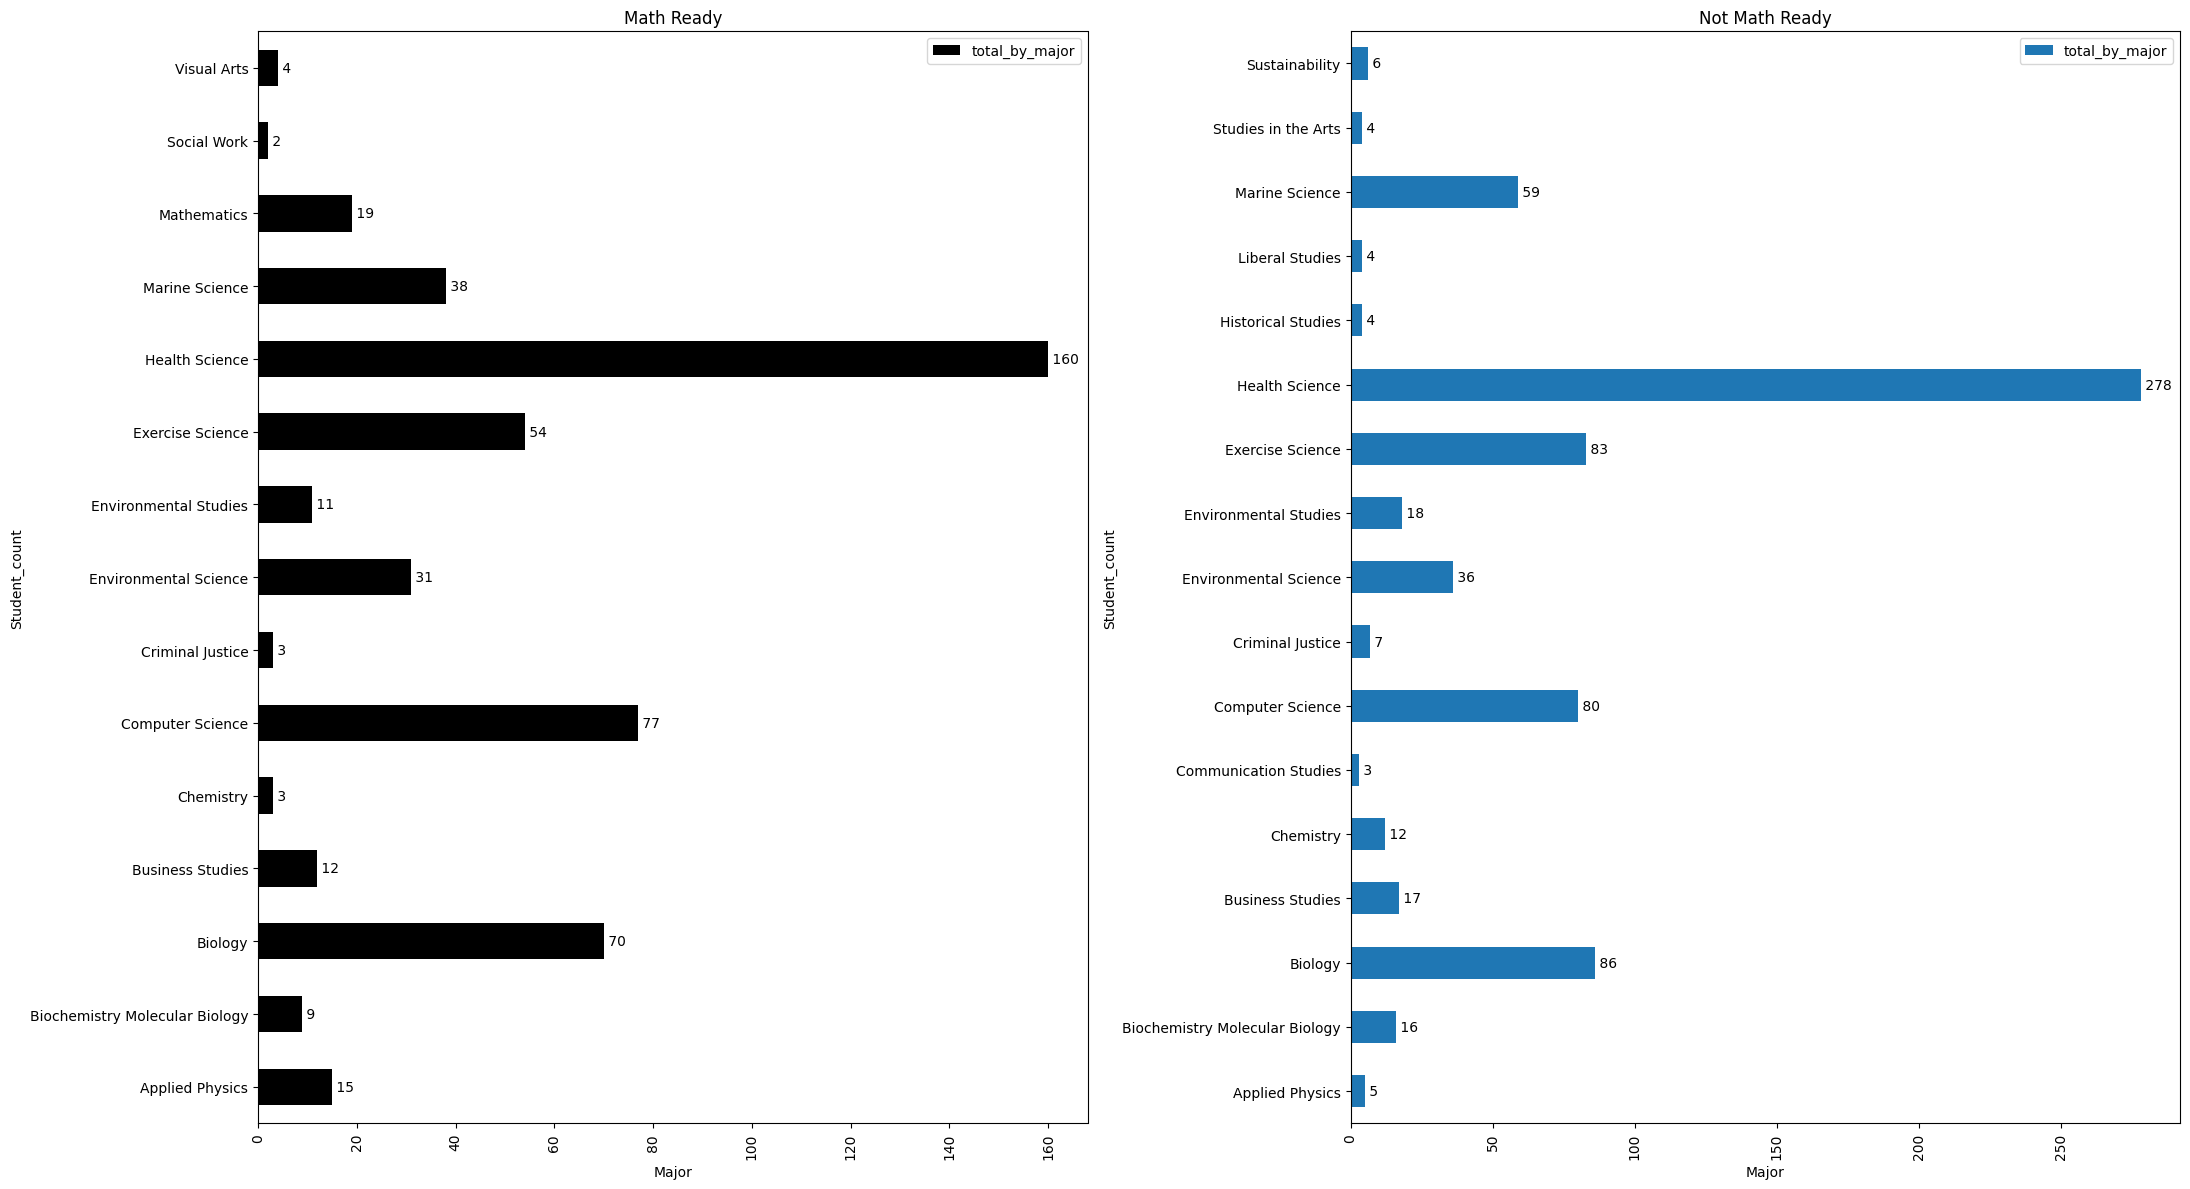

In [52]:
# Separate them by if they are math ready or not
totals_by_major_Y = totals_by_major[totals_by_major['math_readiness_ind'] == 'Y']
totals_by_major_N = totals_by_major[totals_by_major['math_readiness_ind'] == 'N']

# plot both of those graphs
#Create a figure and a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(22, 12))

# Plot 'Y' values in the first subplot
totals_by_major_Y.plot(kind='barh', x='major_desc', y='total_by_major', ax=ax[0], title='Math Ready', color='black')
ax[0].set_ylabel('Student_count')
ax[0].set_xlabel('Major')
ax[0].tick_params(axis='x', rotation= 90)
# Places the number on the graph
for p in ax[0].patches:
    ax[0].text(p.get_width(), p.get_y() + p.get_height() / 2., f' {int(p.get_width())}', 
                va='center', ha='left', color='black', fontsize=10)

# Plot 'N' values in the second subplot
totals_by_major_N.plot(kind='barh', x='major_desc', y='total_by_major', ax=ax[1], title='Not Math Ready')
ax[1].set_ylabel('Student_count')
ax[1].set_xlabel('Major')
ax[1].tick_params(axis='x', rotation = 90)

# places the number on the graph
for p in ax[1].patches:
    ax[1].text(p.get_width(), p.get_y() + p.get_height() / 2., f' {int(p.get_width())}', 
                va='center', ha='left', color='black', fontsize=10)

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


In [53]:
#Puts a copy of the dataset into a new variable
filtered_columns = ['id','major_desc','final_grade','overall_gpa']
filtered_data = conditional_admits[filtered_columns].copy()

# what classes were these students taking
totals_by_gpa = filtered_data.groupby(['major_desc','overall_gpa']).size().reset_index(name='students_in_major')
totals_by_gpa['success_by_gpa'] = (totals_by_gpa['overall_gpa'] >= 3.0).astype(int)

# gets rid of trailing and leading spaces
#totals_by_gpa = totals_by_gpa['Major_Desc_x'].str.strip()

# the function goes through and assigns the school to each major
# if you need to add new majors just add them to this function
def assign_school(row):
    school_of_health_science = ['Health Science', 'Exercise Science']
    school_of_arts_and_humanities = ['Visual Arts','Communication Studies','Historical Studies','Studies in the Arts']
    school_of_social_and_behavioral_sciences = ['Criminal Justice', 'Social Work']
    school_of_business = ['Business Studies', 'Computer Science']
    school_of_general_studies_and_graduate_education = ['Liberal Studies']
    school_of_natural_sciences_and_mathematics = ['Applied Physics', 'Biochemistry Molecular Biology','Biology','Chemistry',
                                                            'Environmental Studies','Marine Science','Mathematics',
                                                            'Environmental Science','Sustainability']
    
    if row['major_desc'] in school_of_health_science:
        return 'School of Health Science'
    elif row['major_desc'] in school_of_arts_and_humanities:
        return 'School of Arts and Humanities'
    elif row['major_desc'] in school_of_social_and_behavioral_sciences:
        return 'School of Social and Behavioral Sciences'
    elif row['major_desc'] in school_of_business:
        return 'School of Business'
    elif row['major_desc'] in school_of_natural_sciences_and_mathematics:
        return 'School of Natural Science and Mathematics'
    elif row['major_desc'] in school_of_general_studies_and_graduate_education:
        return 'School of General Studies and Graduate Education'
    else:
        return 'School not found'

# applies the function to the dataframe
totals_by_gpa['school'] = totals_by_gpa.apply(assign_school, axis=1)

totals_by_gpa.head(3)

,major_desc,overall_gpa,students_in_major,success_by_gpa,school
0,Applied Physics,0.00,4,0,School of Natural Science and Mathematics
1,Applied Physics,1.60,4,0,School of Natural Science and Mathematics
2,Applied Physics,1.93,5,0,School of Natural Science and Mathematics


In [54]:
# Check if there any missing majors with missing schools 
total_count_no_school = (totals_by_gpa['school'] == 'School not found').sum()

no_school_rows = totals_by_gpa[(totals_by_gpa['school'] == 'School not found')]

print(f'Amount of majors not connected to the school {total_count_no_school}')
no_school_rows


Amount of majors not connected to the school 0


,major_desc,overall_gpa,students_in_major,success_by_gpa,school


## Linear Regression trend line by major

In [55]:
# print all the majors 
unique_majors = totals_by_gpa['major_desc'].unique()

# turns it into a list so its easier to use in the next step
unique_majors_list = []
for item in unique_majors:
    unique_majors_list.append(
        item
    )
#Separate all the values into a new data frame and then spits it out
# Dictionary to hold dataframes separated by major
dfs_by_major = {}

# while loop that will make new dataframes based on the previous line of code
while unique_majors_list:
    # Pop the first major from the list
    major = unique_majors_list.pop(0)
    
    # Filter the DataFrame for the current major and create a new DataFrame
    dfs_by_major[major] = totals_by_gpa[totals_by_gpa['major_desc'] == major]
    
    print(f"DataFrame for {major} created with {len(dfs_by_major[major])} rows. Shape of DataFrame: {dfs_by_major[major].shape[0]}")

DataFrame for Applied Physics created with 6 rows. Shape of DataFrame: 6
DataFrame for Biochemistry Molecular Biology created with 7 rows. Shape of DataFrame: 7
DataFrame for Biology created with 42 rows. Shape of DataFrame: 42
DataFrame for Business Studies created with 8 rows. Shape of DataFrame: 8
DataFrame for Chemistry created with 5 rows. Shape of DataFrame: 5
DataFrame for Communication Studies created with 1 rows. Shape of DataFrame: 1
DataFrame for Computer Science created with 35 rows. Shape of DataFrame: 35
DataFrame for Criminal Justice created with 3 rows. Shape of DataFrame: 3
DataFrame for Environmental Science created with 17 rows. Shape of DataFrame: 17
DataFrame for Environmental Studies created with 7 rows. Shape of DataFrame: 7
DataFrame for Exercise Science created with 36 rows. Shape of DataFrame: 36
DataFrame for Health Science created with 65 rows. Shape of DataFrame: 65
DataFrame for Historical Studies created with 1 rows. Shape of DataFrame: 1
DataFrame for Li

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# train test split from sk-learn
from sklearn.model_selection import train_test_split

# training of the model
def train_linear_model(model, x_var, y_var, name ="Default"):
    #fits the model
    model = model.fit(x_var,y_var)
    #predicts on the model
    preds = model.predict(x_var)
    # adjusts the figure and then plots it 
    print(f'Linear Regression R^2 Values {r2_score(y_var, preds)}')
    # Calculate mean squared error
    print(f'Linear Regression Mean squared error (MSE) Value: {mean_squared_error(y_var, preds)}')

In [57]:
'''
To better improve this model you could implement a text set val set and  hold set into the linear regression model
I didn't have time to do it when I was in the assistantship 
'''

#individually make a dataframe for each data frame
seperate_plot_df = [
    dfs_by_major['Applied Physics'],
    dfs_by_major['Biochemistry Molecular Biology'],
    dfs_by_major['Biology'],
    dfs_by_major['Business Studies'],
    dfs_by_major['Chemistry'],
    dfs_by_major['Communication Studies'],
    dfs_by_major['Computer Science'],
    dfs_by_major['Criminal Justice'],
    dfs_by_major['Environmental Science'],
    dfs_by_major['Environmental Studies'],
    dfs_by_major['Exercise Science'],
    dfs_by_major['Health Science'],
    dfs_by_major['Historical Studies'],
    dfs_by_major['Liberal Studies'],
    dfs_by_major['Marine Science'],
    dfs_by_major['Mathematics'],
    dfs_by_major['Social Work'],
    dfs_by_major['Studies in the Arts'], 
    dfs_by_major['Sustainability'],  
    dfs_by_major['Visual Arts']
]
# List of major names
majors = [
    'Applied Physics','Biochemistry Molecular Biology','Biology','Business Studies','Chemistry',
    'Communication Studies','Computer Science','Criminal Justice','Environmental Science',
    'Environmental Studies','Exercise Science','Health Science','Historical Studies',
    'Liberal Studies','Marine Science','Mathematics','Social Work','Studies in the Arts',
    'Sustainability','Visual Arts'
]

# Plotting each DataFrame separately
for df, major in zip(seperate_plot_df, majors):
    if len(df) > 1:
        fig = px.scatter(df, x='overall_gpa', y='students_in_major', 
                            title=f'{major} - Linear and Ridge Regression Analysis',
                            labels={'overall_gpa': 'Overall GPA', 'students_in_major': 'Students in Major'},
                            width=800, height=400)
        
        # Prepare the model data
        maj_x = df['overall_gpa'].values.reshape(-1, 1)
        maj_y = df['students_in_major'].values
        
        # Perform linear regression
        maj_lg = LinearRegression().fit(maj_x, maj_y)
        lin_y_pred = maj_lg.predict(maj_x)
        
        # Add linear regression line to the plot
        fig.add_scatter(x=df['overall_gpa'], y=lin_y_pred, mode='lines', name='Linear Fit')

        # Model evaluation
        print(f'{major} - Linear Regression R^2: {r2_score(maj_y, lin_y_pred)}')
        print(f'{major} - Linear Regression MSE: {mean_squared_error(maj_y, lin_y_pred)}')
        
        # Ridge regression
        maj_ridge = Ridge(alpha=1.0).fit(maj_x, maj_y)
        rid_y_pred = maj_ridge.predict(maj_x)
        
        # Add ridge regression line to the plot
        fig.add_scatter(x=df['overall_gpa'], y=rid_y_pred, mode='lines', name='Ridge Fit')
        
        # Ridge model evaluation
        print(f'{major} - Ridge R^2: {r2_score(maj_y, rid_y_pred)}')
        print(f'{major} - Ridge MSE: {mean_squared_error(maj_y, rid_y_pred)}')

        fig.show()

    elif len(df) == 1:
        fig = px.scatter(df, x='overall_gpa', y='students_in_major',
                            title=f'{major} - Only One Data Point',
                            labels={'overall_gpa': 'Overall GPA', 'students_in_major': 'Students in Major'},
                            width=800, height=400)
        fig.show()

    else:
        print(f'{major} - No data available to plot.')

Applied Physics - Linear Regression R^2: 0.6802591864009733
Applied Physics - Linear Regression MSE: 0.07105351413311707
Applied Physics - Ridge R^2: 0.6746258975490538
Applied Physics - Ridge MSE: 0.07230535610021026


Biochemistry Molecular Biology - Linear Regression R^2: 0.05951789480335867
Biochemistry Molecular Biology - Linear Regression MSE: 0.19193512350951863
Biochemistry Molecular Biology - Ridge R^2: 0.05864010674249376
Biochemistry Molecular Biology - Ridge MSE: 0.1921142639301033


Biology - Linear Regression R^2: 0.0815645152424892
Biology - Linear Regression MSE: 6.606591760820893
Biology - Ridge R^2: 0.08151882872350191
Biology - Ridge MSE: 6.606920398144832


Business Studies - Linear Regression R^2: 0.7564850054509418
Business Studies - Linear Regression MSE: 0.3919069443523905
Business Studies - Ridge R^2: 0.7524165727606312
Business Studies - Ridge MSE: 0.39845457821335917


Chemistry - Linear Regression R^2: 0.5607177046099261
Chemistry - Linear Regression MSE: 0.17571291815602957
Chemistry - Ridge R^2: 0.542543676334279
Chemistry - Ridge MSE: 0.1829825294662884


Computer Science - Linear Regression R^2: 0.0011684713391121315
Computer Science - Linear Regression MSE: 5.694562772381748
Computer Science - Ridge R^2: 0.0011675821287663313
Computer Science - Ridge MSE: 5.694567841969548


Criminal Justice - Linear Regression R^2: 0.7762405131058228
Criminal Justice - Linear Regression MSE: 0.34807031294649793
Criminal Justice - Ridge R^2: 0.7202015304572584
Criminal Justice - Ridge MSE: 0.4352420637331534


Environmental Science - Linear Regression R^2: 0.01096407531831578
Environmental Science - Linear Regression MSE: 3.114265368374854
Environmental Science - Ridge R^2: 0.010891911380732089
Environmental Science - Ridge MSE: 3.11449259738247


Environmental Studies - Linear Regression R^2: 4.1195856874121084e-05
Environmental Studies - Linear Regression MSE: 0.4897757408047964
Environmental Studies - Ridge R^2: 4.043783299390036e-05
Environmental Studies - Ridge MSE: 0.48977611208179894


Exercise Science - Linear Regression R^2: 0.0004717688806650244
Exercise Science - Linear Regression MSE: 5.050085538093678
Exercise Science - Ridge R^2: 0.00047148928030393833
Exercise Science - Ridge MSE: 5.0500869507658726


Health Science - Linear Regression R^2: 0.00011475133782679059
Health Science - Linear Regression MSE: 84.5616562699351
Health Science - Ridge R^2: 0.0001147090683710772
Health Science - Ridge MSE: 84.5616598447205


Marine Science - Linear Regression R^2: 0.1460486621215653
Marine Science - Linear Regression MSE: 0.8488983713821128
Marine Science - Ridge R^2: 0.1457556636077435
Marine Science - Ridge MSE: 0.8491896361769178


Mathematics - Linear Regression R^2: 0.04181940371456483
Mathematics - Linear Regression MSE: 0.11732823627984923
Mathematics - Ridge R^2: 0.017516313371167214
Mathematics - Ridge MSE: 0.1203041248933265


Sustainability - Linear Regression R^2: 1.0
Sustainability - Linear Regression MSE: 0.0
Sustainability - Ridge R^2: 0.22401158941795252
Sustainability - Ridge MSE: 0.19399710264551187


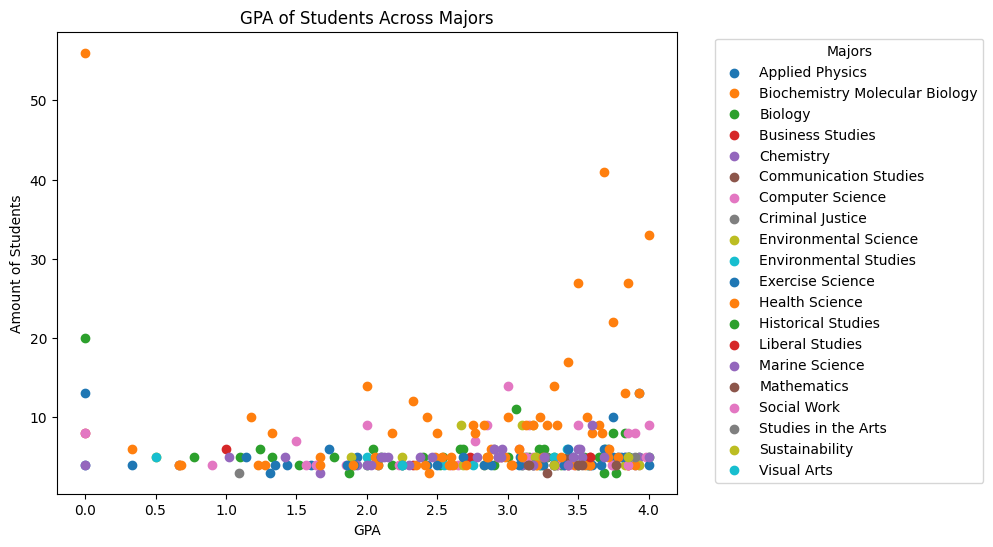

In [58]:
# now lets put them all together
# Create a single figure
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

# Plotting each DataFrame on the same axes
for df, major in zip(seperate_plot_df , majors):
    plt.scatter(df['overall_gpa'], df['students_in_major'], label=major)

# Set plot title, labels, and legend
plt.title('GPA of Students Across Majors')
plt.xlabel('GPA')
plt.ylabel('Amount of Students')
plt.legend(title='Majors', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

Linear Regression R^2 Values 0.025718785071853878
Linear Regression Mean squared error (MSE) Value: 198.85872998065165
Ridge R^2 Value: 0.02571702273095211
Ridge MSE Value: 198.85908968878124


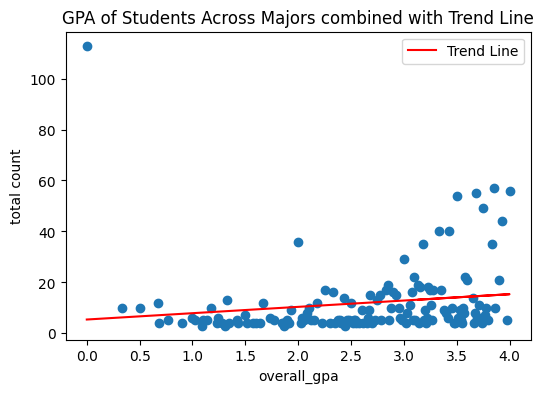

In [59]:
# Aggregate counts for each GPA across all majors
all_counts = {}
for df in seperate_plot_df:
    for index, row in df.iterrows():
        if row['overall_gpa'] in all_counts:
            all_counts[row['overall_gpa']] += row['students_in_major']
        else:
            all_counts[row['overall_gpa']] = row['students_in_major']

# Convert dictionary to DataFrame
aggregated_combinded_df = pd.DataFrame(list(all_counts.items()), columns=['overall_gpa', 'total_count'])

#prepares the model to be inserted into a linear regression by turning them into a numpy array
# on x it makes it a 2D array This reshaping is necessary because scikit-learn's LinearRegression class expects 
# the independent variable to be in a specific shape, where each row represents a sample (data point) 
# and each column represents a feature (independent variable).
x = aggregated_combinded_df['overall_gpa'].values.reshape(-1, 1)
y = aggregated_combinded_df['total_count'].values

## Perform linear regression
# Calculate R-squared value
all_lg = LinearRegression().fit(x, y)
# generates predictions using the trained model
lin_y_pred = all_lg.predict(x)
# Calculate R-squared value
print(f'Linear Regression R^2 Values {r2_score(y, lin_y_pred)}')
# Calculate mean squared error
print(f'Linear Regression Mean squared error (MSE) Value: {mean_squared_error(y, lin_y_pred)}')

# completes linear regression ridge
# generates predictions using the trained model
all_ridge = Ridge(alpha=1.0).fit(x, y)
rid_y_pred = all_ridge.predict(x)
print(f'Ridge R^2 Value: {r2_score(y, rid_y_pred)}')
print(f'Ridge MSE Value: {mean_squared_error(y, rid_y_pred)}')

# Plot the aggregated data and the trend line
plt.figure(figsize=(6, 4))
plt.scatter(aggregated_combinded_df['overall_gpa'], aggregated_combinded_df['total_count'])
plt.plot(x, lin_y_pred, color='red', linestyle='-', label='Trend Line')

# Set plot title, labels, and legend
plt.title("GPA of Students Across Majors combined with Trend Line")
plt.xlabel('overall_gpa')
plt.ylabel('total count')
plt.legend()

# Show the plot
plt.show()

## Linear Regression trend line by school

In [60]:
#Makes a data frame by school 
# print all the majors 
unique_school = totals_by_gpa['school'].unique()

# turns it into a list so its easier to use in the next step
unique_school_list = []
for item in unique_school:
    unique_school_list.append(
        item
    )
#Separate all the values into a new data frame and then spits it out
# Dictionary to hold dataframes separated by major
dfs_by_school = {}

# while loop that will make new dataframes based on the previous line of code
while unique_school_list:
    # Pop the first major from the list
    school = unique_school_list.pop(0)
    
    # Filter the DataFrame for the current major and create a new DataFrame
    dfs_by_school[school] = totals_by_gpa[totals_by_gpa['school'] == school]
    
    print(f"DataFrame for {school} created with {len(dfs_by_school[school])} rows.")
    


DataFrame for School of Natural Science and Mathematics created with 119 rows.
DataFrame for School of Business created with 43 rows.
DataFrame for School of Arts and Humanities created with 4 rows.
DataFrame for School of Social and Behavioral Sciences created with 4 rows.
DataFrame for School of Health Science created with 101 rows.
DataFrame for School of General Studies and Graduate Education created with 1 rows.


R-squared: 0.013015117241396701
Mean squared error: 3.4751123687835554
Slope: -0.22279992503547424
Intercept: 5.622413742986418


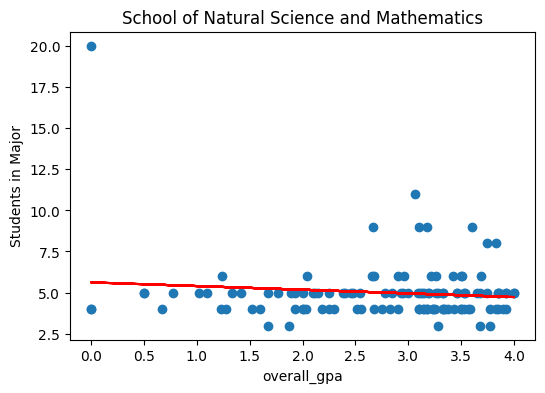

R-squared: 0.004488272847576691
Mean squared error: 4.965175309788885
Slope: -0.1404365086701546
Intercept: 5.973180548373762


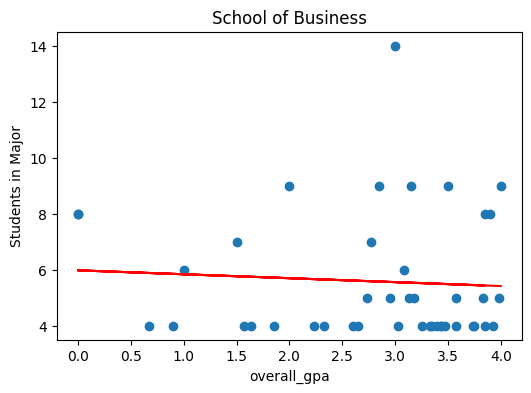

R-squared: 0.25558687049847784
Mean squared error: 0.1395774617815354
Slope: 0.2861047057818772
Intercept: 3.9145742591169186


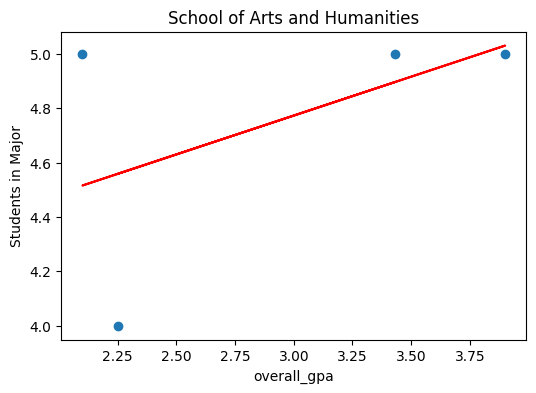

R-squared: 0.27637925260987295
Mean squared error: 0.9045259342376588
Slope: 0.5698541290925219
Intercept: 2.9172301564455205


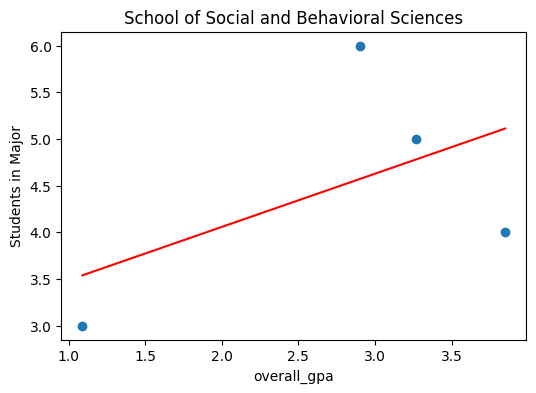

R-squared: 4.837975355997948e-06
Mean squared error: 60.496129239221304
Slope: -0.0179976532856738
Intercept: 7.882349235234808


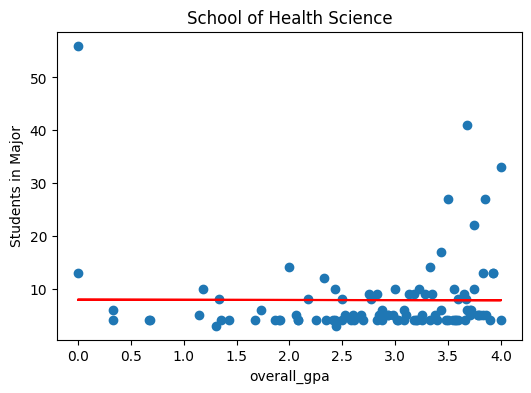

R-squared: nan
Mean squared error: 0.0
Slope: 0.0
Intercept: 5.0


c:\Users\kahsw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



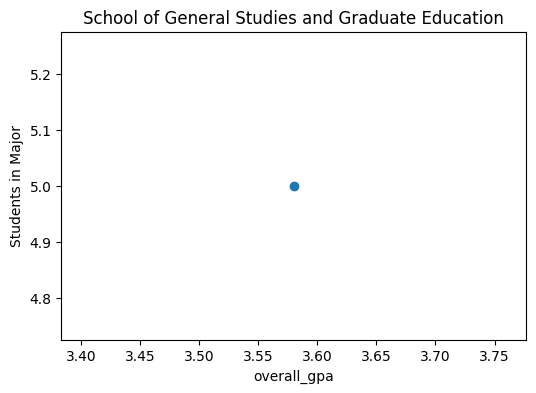

In [63]:
#individually make a dataframe for each data frame
seperate__school_plot_df = [
    dfs_by_school['School of Natural Science and Mathematics'],
    dfs_by_school['School of Business'],
    dfs_by_school['School of Arts and Humanities'],
    dfs_by_school['School of Social and Behavioral Sciences'],
    dfs_by_school['School of Health Science'],
    dfs_by_school['School of General Studies and Graduate Education']
]
# List of major names
schools = [
    'School of Natural Science and Mathematics','School of Business','School of Arts and Humanities',
    'School of Social and Behavioral Sciences','School of Health Science','School of General Studies and Graduate Education'
]

# Plotting each DataFrame separately
for df , major in zip(seperate__school_plot_df, schools):
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    plt.scatter(df ['overall_gpa'], df['students_in_major'])
    
    #prepares the model to be inserted into a linear regression by turning them into a numpy array
    # on x it makes it a 2D array This reshaping is necessary because scikit-learn's LinearRegression class expects 
    # the independent variable to be in a specific shape, where each row represents a sample (data point) 
    # and each column represents a feature (independent variable).
    x = df['overall_gpa'].values.reshape(-1, 1)
    y = df ['students_in_major'].values
    
    ## Perform linear regression
    # Calculate R-squared value
    model = LinearRegression().fit(x, y)
    # generates predictions using the trained model
    predicted_counts = model.predict(x)
    # Calculate R-squared value
    r_squared = model.score(x, y)
    print(f'R-squared: {r_squared}')
    # Calculate mean squared error
    mse = mean_squared_error(y, predicted_counts)
    print(f'Mean squared error: {mse}')


    # Print coefficients and plot linear regression line
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    plt.plot(x, model.predict(x), color='red', linestyle='-')
    
    plt.title(major)
    plt.xlabel('overall_gpa')
    plt.ylabel('Students in Major')
    plt.show()

## Random Forest Model

Random forrest is a model that builds a "forest" with a group of decision trees. They are trained with the bagging method. Simply said radom forest builds multiple decision and merges them together to get a more accurate and stable prediction.

In [64]:
conditional_admits.head(3)

,id,semester,sarappd_apdc_code,attendance_status,act_composite,rec_test_plan,fafsa_ind,rec_country_of_orig,rec_eof_location,gender,major,saradap_admt_code,program,first_gen_ind,math_readiness_ind,pckg_group_ind,concentration,housing_interest,hs_name,overall_gpa,major_desc,spraddr_cnty_code,age,saradap_majr_code_conc_1,housing,final_grade,hs_state,hs_county,saradap_styp_code_2,spraddr_stat_code,col_desc,sarappd_apdc_date,rec_completed_date,hous_dep_paid,hs_city,sat_erbw,dchs_ind,sat_math,sat_total,col_state,ethnicity
0,132318,spring,IE,ft,NaN,I will NOT submit SAT or ACT scores,n,Bangladesh,NaN,m,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,NaN,NaN,GENE,HO,MC College,NaN,Computer Science,1,21,COND,NaN,NaN,NaN,Out of State,F,NJ,NaN,2022-04-20,2022-03-23,Y,Sylhet,NaN,NaN,NaN,0,NaN,Non-Resident
1,132296,NaN,IE,NaN,NaN,I will NOT submit SAT or ACT scores,n,Bangladesh,NaN,m,CSCI,FX,NaN,FGNN: Graduated from college: Bachelors degree,NaN,NaN,NaN,HO,Milestone College,NaN,NaN,99,18,COND,NaN,NaN,NaN,Out of State,F,NaN,NaN,2022-04-21,2022-03-21,Y,Dhaka,NaN,NaN,NaN,0,NaN,Non-Resident
2,131801,spring,IE,ft,NaN,I will NOT submit SAT or ACT scores,y,NaN,NaN,m,BIOL,FR,BIOL-BS,NaN,NaN,UGONN,GENE,HO,BRICK TOWNSHIP HIGH SCHOOL,NaN,Biology,29,18,COND,Y,NaN,NJ,Ocean,F,NJ,OCEAN COUNTY COLLEGE,2022-04-23,2022-02-21,Y,BRICKTOWN,NaN,NaN,NaN,0,NJ,Native Hawaiian or other Pacific Islander


This model trains on the fall admits and tests on the spring

In [65]:
# makes a copy so original data frame is untouched
# training data
success_target_gpa_spring = spring_conditional_admits.copy()
# testing data 
success_target_gpa_fall = fall_conditional_admits.copy()
# creates a new row where any GPA that is 3.0 or higher it will turn into 1 otherwise it will become 0
success_target_gpa_fall['success_by_gpa'] = (success_target_gpa_fall['overall_gpa'] >= 3.0).astype(int)
success_target_gpa_spring['success_by_gpa'] = (success_target_gpa_spring['overall_gpa'] >= 3.0).astype(int)
# prints the first 5 rows

print(f"Number of students with GPA 3.0 or above for fall: {success_target_gpa_fall['overall_gpa'].head(3)}")
print(f"Number of students with GPA 3.0 or above for spring: {success_target_gpa_spring['overall_gpa'].head(3)}")

combined_gpa_data = pd.concat([success_target_gpa_fall, success_target_gpa_spring], ignore_index=True)

combined_gpa_data.head(2)

Number of students with GPA 3.0 or above for fall: 0    4.0
1    4.0
2    4.0
Name: overall_gpa, dtype: float64
Number of students with GPA 3.0 or above for spring: 0   NaN
1   NaN
2   NaN
Name: overall_gpa, dtype: float64


,sarappd_apdc_code,attendance_status,act_composite,rec_test_plan,fafsa_ind,rec_country_of_orig,rec_eof_location,gender,semester,major,saradap_admt_code,program,first_gen_ind,math_readiness_ind,pckg_group_ind,concentration,housing_interest,hs_name,overall_gpa,major_desc,spraddr_cnty_code,age,saradap_majr_code_conc_1,housing,final_grade,hs_state,hs_county,saradap_styp_code_2,id,spraddr_stat_code,col_desc,sarappd_apdc_date,rec_completed_date,hous_dep_paid,hs_city,sat_erbw,dchs_ind,sat_math,sat_total,col_state,ethnicity,success_by_gpa
0,IE,ft,NaN,I will NOT submit SAT or ACT scores,NaN,Bangladesh,NaN,m,fall,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,Y,NaN,GENE,HO,MC College,4.0,Computer Science,1,21,COND,NaN,A,NaN,Out of State,F,132318,NJ,NaN,2022-04-20,2022-03-23,Y,Sylhet,NaN,NaN,NaN,0,NaN,Non-Resident,1
1,IE,ft,NaN,I will NOT submit SAT or ACT scores,NaN,Bangladesh,NaN,m,fall,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,Y,NaN,GENE,HO,MC College,4.0,Computer Science,1,21,COND,NaN,A,NaN,Out of State,F,132318,NJ,NaN,2022-04-20,2022-03-23,Y,Sylhet,NaN,NaN,NaN,0,NaN,Non-Resident,1


In [66]:
# gets a count of all the GPA's that are 3.0 or higher
fall_count_3_or_above = success_target_gpa_fall.loc[success_target_gpa_fall['overall_gpa'] >= 3.0].shape[0]
spring_count_3_or_above = success_target_gpa_spring.loc[success_target_gpa_spring['overall_gpa'] >= 3.0].shape[0]
print(f"Number of students with GPA 3.0 or above for fall: {fall_count_3_or_above}")
print(f"Number of students with GPA 3.0 or above for spring: {spring_count_3_or_above}")
success_target_gpa_fall['overall_gpa'] 

Number of students with GPA 3.0 or above for fall: 952
Number of students with GPA 3.0 or above for spring: 0


0       4.00
1       4.00
2       4.00
3       4.00
4       2.65
        ... 
1668    2.00
1669     NaN
1670     NaN
1671     NaN
1672     NaN
Name: overall_gpa, Length: 1673, dtype: float64

In [67]:
combined_gpa_data['overall_gpa'] = combined_gpa_data['overall_gpa'].fillna(0).astype(int)

# Define bins and labels for GPA ranges
bins = [0, 1, 2, 3, 4]
labels = ['0-1', '1-2', '2-3', '3-4']

# Directly create binary flags from 'overall_gpa' and concatenate with the original DataFrame
gpa_binned = pd.get_dummies(pd.cut(combined_gpa_data['overall_gpa'], bins=bins, labels=labels, right=False), prefix='GPA')

combined_gpa_data = pd.concat([combined_gpa_data, gpa_binned], axis=1)
combined_gpa_data = combined_gpa_data .reset_index(drop=True)

combined_gpa_data 


,sarappd_apdc_code,attendance_status,act_composite,rec_test_plan,fafsa_ind,rec_country_of_orig,rec_eof_location,gender,semester,major,saradap_admt_code,program,first_gen_ind,math_readiness_ind,pckg_group_ind,concentration,housing_interest,hs_name,overall_gpa,major_desc,spraddr_cnty_code,age,saradap_majr_code_conc_1,housing,final_grade,hs_state,hs_county,saradap_styp_code_2,id,spraddr_stat_code,col_desc,sarappd_apdc_date,rec_completed_date,hous_dep_paid,hs_city,sat_erbw,dchs_ind,sat_math,sat_total,col_state,ethnicity,success_by_gpa,GPA_0-1,GPA_1-2,GPA_2-3,GPA_3-4
0,IE,ft,NaN,I will NOT submit SAT or ACT scores,NaN,Bangladesh,NaN,m,fall,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,Y,NaN,GENE,HO,MC College,4,Computer Science,1,21,COND,NaN,A,NaN,Out of State,F,132318,NJ,NaN,2022-04-20,2022-03-23,Y,Sylhet,NaN,NaN,NaN,0,NaN,Non-Resident,1,False,False,False,False
1,IE,ft,NaN,I will NOT submit SAT or ACT scores,NaN,Bangladesh,NaN,m,fall,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,Y,NaN,GENE,HO,MC College,4,Computer Science,1,21,COND,NaN,A,NaN,Out of State,F,132318,NJ,NaN,2022-04-20,2022-03-23,Y,Sylhet,NaN,NaN,NaN,0,NaN,Non-Resident,1,False,False,False,False
2,IE,ft,NaN,I will NOT submit SAT or ACT scores,NaN,Bangladesh,NaN,m,fall,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,Y,NaN,GENE,HO,MC College,4,Computer Science,1,21,COND,NaN,A,NaN,Out of State,F,132318,NJ,NaN,2022-04-20,2022-03-23,Y,Sylhet,NaN,NaN,NaN,0,NaN,Non-Resident,1,False,False,False,False
3,IE,ft,NaN,I will NOT submit SAT or ACT scores,NaN,Bangladesh,NaN,m,fall,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,Y,NaN,GENE,HO,MC College,4,Computer Science,1,21,COND,NaN,A,NaN,Out of State,F,132318,NJ,NaN,2022-04-20,2022-03-23,Y,Sylhet,NaN,NaN,NaN,0,NaN,Non-Resident,1,False,False,False,False
4,IE,ft,NaN,I will NOT submit SAT or ACT scores,NaN,Bangladesh,NaN,m,fall,CSCI,FX,CSCI,FGNN: Graduated from college: Bachelors degree,Y,NaN,COND,HO,Milestone College,2,Computer Science,99,18,COND,NaN,C+,NaN,Out of State,F,132296,NaN,NaN,2022-04-21,2022-03-21,Y,Dhaka,NaN,NaN,NaN,0,NaN,Non-Resident,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,IE,NaN,NaN,I will NOT submit SAT or ACT scores,Y,NaN,NaN,m,NaN,CSCI,FR,NaN,FGNY: High School diploma or GED,NaN,UGWPN,NaN,NaN,ATLANTIC COUNTY INST OF TECH,0,NaN,1,25,COND,NaN,NaN,NJ,Atlantic,F,124114,NJ,NaN,2022-08-08,2022-07-29,NaN,MAYS LANDING,NaN,NaN,NaN,0,NaN,More Than 1 Race,0,True,False,False,False
2044,IE,NaN,NaN,I will NOT submit SAT or ACT scores,Y,NaN,NaN,f,NaN,HLSC,FR,NaN,NaN,NaN,UGONN,NaN,HO,NORTH STAR ACADEMY CHARTER,0,NaN,13,18,COND,NaN,NaN,NJ,Essex,F,132815,NJ,NaN,2022-05-01,2021-12-22,NaN,NEWARK,510.0,NaN,540.0,1050,NaN,Black or African American,0,True,False,False,False
2045,IE,NaN,NaN,I will NOT submit SAT or ACT scores,Y,NaN,NaN,f,NaN,HLSC,FR,NaN,FGNY: Some college,NaN,REJISR,NaN,HO,EGG HARBOR TOWNSHIP HS,0,NaN,1,19,COND,NaN,NaN,NJ,Atlantic,F,132463,NJ,NaN,2022-06-07,2022-04-25,NaN,EGG HARBOR TOWNSHIP,NaN,NaN,NaN,0,NaN,Hispanic or Latino,0,True,False,False,False
2046,IE,NaN,17.0,I will submit SAT or ACT scores,Y,NaN,NaN,f,NaN,HLSC,FR,NaN,FGNY: Some college,NaN,UGWPN,NaN,NaN,NaN,0,NaN,1,18,COND,NaN,NaN,NaN,NaN,F,132421,NJ,NaN,2022-05-03,2022-04-13,NaN,NaN,NaN,NaN,NaN,0,NaN,Caucasian or White,0,True,False,False,False


In [68]:
# subset numerical columns from categorical
combined_num_cols= pd.DataFrame(combined_gpa_data[combined_gpa_data.select_dtypes(include = ['float', 'int']).columns])

# remove the target value from the training set
combined_num_cols = combined_num_cols.drop(['success_by_gpa'], axis= 1)

combined_num_cols.columns

Index(['act_composite', 'overall_gpa', 'spraddr_cnty_code', 'age', 'id',
       'sat_erbw', 'sat_math', 'sat_total'],
      dtype='object')

In [69]:
# standard scaler, change scale/magnitudes of data to 0 - 1; z = (x - u) / s, x = value, u = mean of training samples, s = stdev
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# we are going to vectorize the ID for later text input so we will drop it for now 
fall_cols_no_id = combined_num_cols.copy()
print(type(fall_cols_no_id))
id_column = fall_cols_no_id.pop('id')
# Scale numeric variables
sc = StandardScaler()
#random forest cannot handle NaN so we will take the mean
numeric_transformer = SimpleImputer(strategy='mean')

num_cols_scaled = pd.DataFrame(sc.fit_transform(fall_cols_no_id), columns = fall_cols_no_id.columns)
num_cols_imputed = pd.DataFrame(numeric_transformer.fit_transform(fall_cols_no_id ), columns= fall_cols_no_id.columns)

# reinsert the id column
num_cols_imputed['id'] = id_column

# reset index for both numerical scaled and encoded categorical so additional rows are not introduced after concatenation
num_cols_imputed.reset_index(drop=True, inplace=True)
# converts to int so the random forest accepts the values
for col in num_cols_imputed.columns:
    # Check if the column contains float values
    if num_cols_imputed[col].dtype == 'float64':
        # Convert float values to integers
        num_cols_imputed[col] = num_cols_imputed[col].astype(int)

num_cols_imputed.head(3)

<class 'pandas.core.frame.DataFrame'>


,act_composite,overall_gpa,spraddr_cnty_code,age,sat_erbw,sat_math,sat_total,id
0,19,4,1,21,499,481,0,132318
1,19,4,1,21,499,481,0,132318
2,19,4,1,21,499,481,0,132318


In [70]:
# subset the other columns into a categorical data frame
combined_cat_cols = pd.DataFrame(combined_gpa_data[combined_gpa_data.select_dtypes(include = ['object']).columns])
combined_cat_cols.columns

Index(['sarappd_apdc_code', 'attendance_status', 'rec_test_plan', 'fafsa_ind',
       'rec_country_of_orig', 'rec_eof_location', 'gender', 'semester',
       'major', 'saradap_admt_code', 'program', 'first_gen_ind',
       'math_readiness_ind', 'pckg_group_ind', 'concentration',
       'housing_interest', 'hs_name', 'major_desc', 'saradap_majr_code_conc_1',
       'housing', 'final_grade', 'hs_state', 'hs_county',
       'saradap_styp_code_2', 'spraddr_stat_code', 'col_desc',
       'sarappd_apdc_date', 'rec_completed_date', 'hous_dep_paid', 'hs_city',
       'dchs_ind', 'col_state', 'ethnicity'],
      dtype='object')

In [71]:
#NOTE removed columns with high cardinality
columns_to_select = [
    'concentration', 'hs_county', 'semester', 'major_desc',
        'rec_eof_location', 'ethnicity', 'pckg_group_ind',
        'rec_country_of_orig', 'rec_test_plan', 'housing_interest',
        'spraddr_stat_code', 'attendance_status',
        'hs_state', 'major', 'saradap_admt_code',
        'program', 'gender', 'col_state', 'saradap_majr_code_conc_1',
        'housing', 'saradap_styp_code_2', 'fafsa_ind', 'math_readiness_ind',
        'hous_dep_paid', 'dchs_ind', 'col_desc',
        'first_gen_ind', 'final_grade'
]

# Selecting the specified columns from the original DataFrame
selected_cat_cols = combined_cat_cols[columns_to_select]
# counts the number of unique items that are not NaN
unique_values = selected_cat_cols.nunique()
unique_values

concentration               25
hs_county                   22
semester                     2
major_desc                  24
rec_eof_location             3
ethnicity                    8
pckg_group_ind               5
rec_country_of_orig          2
rec_test_plan                2
housing_interest             1
spraddr_stat_code            6
attendance_status            2
hs_state                     5
major                       12
saradap_admt_code            7
program                     29
gender                       3
col_state                    6
saradap_majr_code_conc_1     1
housing                      1
saradap_styp_code_2          1
fafsa_ind                    1
math_readiness_ind           2
hous_dep_paid                1
dchs_ind                     1
col_desc                    23
first_gen_ind                9
final_grade                 17
dtype: int64

In [72]:
# one hot encode the categorical variables
# reset index for both numerical scaled and encoded categorical so additional rows are not introduced after concatenation
encoded_cat_cols = pd.get_dummies(selected_cat_cols).reset_index(drop=True)

# properly converts booleans to 1 == true and 0 == false
def convert_values(x):
    # If numeric than skip
    if isinstance(x, bool):
        # converts to lowercase 
        if x == True:
            return 1
        if x == False:
            return 0
    return x

for col in encoded_cat_cols:
    encoded_cat_cols[col] = encoded_cat_cols[col].apply(convert_values)

# concat the numerical and one hot encoded variables
train_data = pd.concat([encoded_cat_cols, num_cols_imputed], axis = 1)

train_data

,concentration_ACTU,concentration_BUSA,concentration_CMDS,concentration_COND,concentration_EDUC,concentration_ELEM,concentration_ENGN,concentration_FIN,concentration_FORE,concentration_FORS,concentration_GENE,concentration_HOME,concentration_MBIO,concentration_MGMT,concentration_MHLT,concentration_MKTG,concentration_OCEN,concentration_PRAD,concentration_PROF,concentration_PROT,concentration_PRPT,concentration_SSHY,concentration_VCOM,concentration_VIBA,concentration_WILD,hs_county_Atlantic,hs_county_Bergen,hs_county_Burlington,hs_county_Camden,hs_county_Cape May,hs_county_Cumberland,hs_county_Essex,hs_county_Gloucester,hs_county_Hudson,hs_county_Hunterdon,hs_county_Mercer,hs_county_Middlesex,hs_county_Monmouth,hs_county_Morris,hs_county_Ocean,hs_county_Out of State,hs_county_Passaic,hs_county_Salem,hs_county_Somerset,hs_county_Sussex,hs_county_Union,hs_county_Warren,semester_fall,semester_spring,major_desc_Applied Physics,major_desc_Biochemistry Molecular Biology,major_desc_Biology,major_desc_Business Studies,major_desc_Chemistry,major_desc_Communication Studies,major_desc_Computer Information Systems,major_desc_Computer Science,major_desc_Criminal Justice,major_desc_Digital Studies,major_desc_Environmental Science,major_desc_Environmental Studies,major_desc_Exercise Science,major_desc_Geology,major_desc_Health Science,major_desc_Historical Studies,major_desc_Liberal Studies,major_desc_Marine Science,major_desc_Mathematics,major_desc_Psychology,major_desc_Social Work,major_desc_Studies in the Arts,major_desc_Sustainability,major_desc_Visual Arts,rec_eof_location_Atlantic City 1,rec_eof_location_Atlantic City 1 - Verified,rec_eof_location_Main Campus - Verified,ethnicity_Asian,ethnicity_Black or African American,ethnicity_Caucasian or White,ethnicity_Hispanic or Latino,ethnicity_More Than 1 Race,ethnicity_Native Hawaiian or other Pacific Islander,ethnicity_Non-Resident,ethnicity_Unknown or Not Specified,pckg_group_ind_REJISR,pckg_group_ind_UGOFFN,pckg_group_ind_UGONN,pckg_group_ind_UGOUTN,pckg_group_ind_UGWPN,rec_country_of_orig_Bangladesh,rec_country_of_orig_Sierra Leone,rec_test_plan_I will NOT submit SAT or ACT scores,rec_test_plan_I will submit SAT or ACT scores,housing_interest_HO,spraddr_stat_code_CT,spraddr_stat_code_DE,spraddr_stat_code_MD,spraddr_stat_code_NJ,spraddr_stat_code_NY,spraddr_stat_code_PA,attendance_status_ft,attendance_status_pt,hs_state_CT,hs_state_DE,hs_state_NJ,hs_state_NY,hs_state_PA,major_BCMB,major_BIOL,major_CHEM,major_CSCI,major_ENSC,major_ENVL,major_EXSC,major_HLSC,major_MARS,major_MATH,major_PHYS,major_SSTB,saradap_admt_code_EO,saradap_admt_code_FI,saradap_admt_code_FR,saradap_admt_code_FX,saradap_admt_code_PH,saradap_admt_code_PM,saradap_admt_code_SP,program_ARTS,program_ARTV-BFA,program_BCMB,program_BIOL-BA,program_BIOL-BS,program_BUSN-BA,program_BUSN-BS,program_CHEM-BA,program_CHEM-BS,program_COMM,program_CRIM,program_CSCI,program_DIGI,program_ENVL-BA,program_ENVL_BS,program_EXSC-BS,program_GEOL-BS,program_HIST,program_HLTH-BS,program_INSY,program_LIBA,program_MARS-BA,program_MARS-BS,program_MATH-BA,program_MATH-BS,program_PHYS-BS,program_PSYC-BS,program_SOWK,program_SUST-BA,gender_f,gender_m,gender_n,col_state_CT,col_state_DC,col_state_NJ,col_state_NY,col_state_PA,col_state_VT,saradap_majr_code_conc_1_COND,housing_Y,saradap_styp_code_2_F,fafsa_ind_Y,math_readiness_ind_N,math_readiness_ind_Y,hous_dep_paid_Y,dchs_ind_Y,col_desc_ATLANTIC CAPE COMMUNITY COL,col_desc_BROOKDALE COMMUNITY COLLEGE,col_desc_BUCKS COUNTY COMMUNITY COL,col_desc_CAMDEN COUNTY COLLEGE,col_desc_GEORGETOWN UNIVERSITY,col_desc_HUDSON COUNTY COMMUNITY COL,col_desc_MERCER COUNTY COMMUNITY COL,col_desc_MIDDLESEX COLLEGE,col_desc_OCEAN COUNTY COLLEGE,col_desc_RCSJ - Cumberland,col_desc_RCSJ - Gloucester,col_desc_ROWAN COLLEGE AT BURLINGTON C,col_desc_ROWAN UNIVERSITY,col_desc_RUTGERS Camden Arts & Sciences,col_desc_RUTGERS New Brunswick Piscatwy,col_desc_Rutgers Univ-Newark PreCol,col_desc_SALEM COMMUNITY COLLEGE,col_desc_SETON H

In [73]:
# check percentage of records where students have good GPA
success_target_gpa_fall.loc[:, 'success_by_gpa'].sum() / success_target_gpa_fall.shape[0] * 100

56.903765690376574

In [74]:
# address class imbalance using SMOTE
from imblearn.over_sampling import RandomOverSampler

# If you wanted to drop any of the columns you would do it at this step
# However you want to keep it in your y 

# x axis
features = train_data
# y axis
target = combined_gpa_data['success_by_gpa']
target.fillna(0, inplace=True)


# Splits the data into 70% train 30% test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Splits the 30% test set into 15% hold and 15% validation
x_hold, x_val, y_hold, y_val = train_test_split(x_test,y_test, test_size=0.5, random_state=42)


# Reset the indexes of teh training and testing sets
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
x_hold = x_hold.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)
y_hold = y_hold.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

#validate the split
print(f"size of x_train: {x_train.shape}")
print(f"size of y_train {y_train.shape}")
print(" ")
print(f"initial size of x_test {x_test.shape}")
print(f"initial size of y_test {y_test.shape}")
print(" ")
print(f"size of x_val {x_val.shape}")
print(f"size of y_val {y_val.shape}")
print(" ")
print(f"size of final test x_hold {x_hold.shape}")
print(f"size of final test y_hold {y_hold.shape}")

size of x_train: (1536, 229)
size of y_train (1536,)
 
initial size of x_test (512, 229)
initial size of y_test (512,)
 
size of x_val (256, 229)
size of y_val (256,)
 
size of final test x_hold (256, 229)
size of final test y_hold (256,)


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import math

# training of the model
def train_the_model(model, x_var, y_var, name ="Default"):
    #fits the model
    model = model.fit(x_var,y_var)
    #predicts on the model
    preds = model.predict(x_var)
    # prints confusion matrix
    cm = confusion_matrix(y_var,  preds)
    # adjusts the figure and then plots it 
    plt.figure(figsize=(6,6))
    sns.set_theme(font_scale=1.5) 
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False);
    
    #prints information
    print(f"Classification Report for {name}:")
    print(classification_report(y_var, preds, zero_division=1))


Classification Report for Training Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       845
           1       0.97      0.88      0.92       691

    accuracy                           0.93      1536
   macro avg       0.94      0.93      0.93      1536
weighted avg       0.93      0.93      0.93      1536



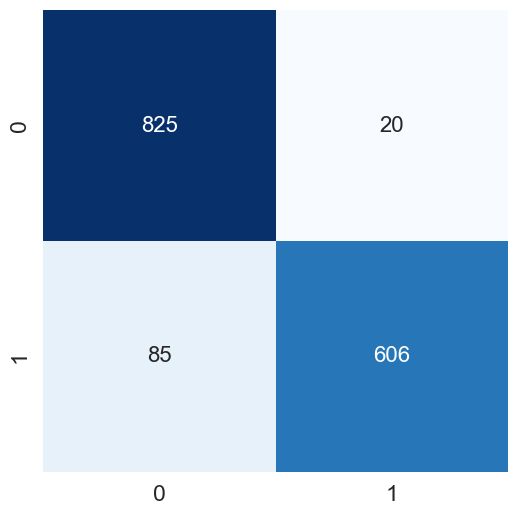

In [76]:
# we need more data


# sets up the random forest classifier train and validate instance
# to tweak you can add n_estimators and max_depth to changes the parameters of the Random Forest parameters
# you will tune at this level

# n_estimators: the number of trees to be used in the forest
# max_depth: maximum number of features to consider while looking for a split
# random_state: controls randomness of the sample
rclf = RandomForestClassifier(n_estimators = 1, max_depth= 15, random_state=42)

# parameters
# x_train,y_train

train_the_model(rclf, x_train, y_train, name="Training Random Forest Classifier")


# TN, top-left
#     Correctly predicted the negative class (GPA below 3).
# FP, top-right
#     Incorrectly predicted the positive class (GPA of 3 or above) when the actual was negative.
# FN, bottom-left
#     Incorrectly predicted the negative class when the actual was positive.
# (TP, bottom-right
#     Crrectly predicted the positive class.

Classification Report for Validating Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       128
           1       0.80      0.97      0.88       128

    accuracy                           0.86       256
   macro avg       0.88      0.86      0.86       256
weighted avg       0.88      0.86      0.86       256



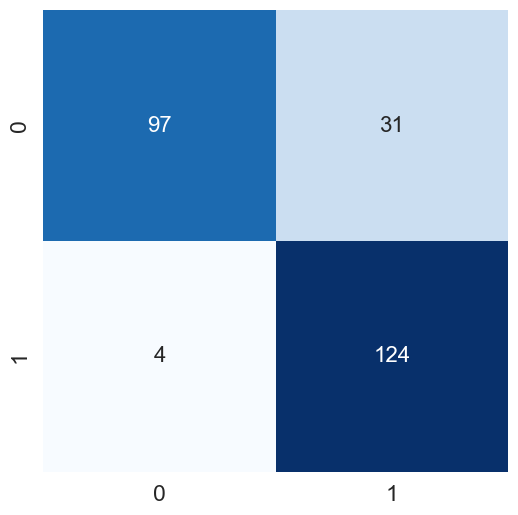

In [77]:
# parameters
# x_val,y_val

train_the_model(rclf, x_val,y_val, name="Validating Random Forest Classifier")


Classification Report for Final testing of Random Forest Classifier:


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       123
           1       0.95      0.95      0.95       133

    accuracy                           0.95       256
   macro avg       0.95      0.95      0.95       256
weighted avg       0.95      0.95      0.95       256



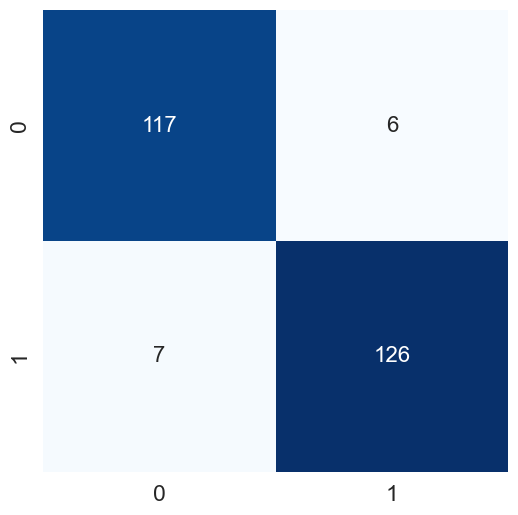

In [78]:
# hold set (final testing set)

# parameters
# x_hold,y_hold

train_the_model(rclf, x_hold,y_hold, name="Final testing of Random Forest Classifier")

In [79]:
# deploying this into the shiny python
# https://rpubs.com/kinantytasya/deploy-ml-shiny
# Note the video has terrible audio

import joblib

# Serialize the model
joblib.dump(rclf, 'ga_randomforest_model.joblib')

joblib.dump(maj_lg, "ga_linear_maj_regression_model.joblib")
joblib.dump(all_lg, "ga_linear_all_regression_model.joblib")

['ga_ridge_all_regression_model.joblib']